In [224]:
import re


def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased exceptx
    """
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()


def text_cleaner(text):
    """
    cleaning spaces, html tags, etc
    parameters: (string) text input to clean
    return: (string) clean_text
    """
    text = text.replace(".", "")
    text = text.replace("[", " ")
    text = text.replace(",", " ")
    text = text.replace("]", " ")
    text = text.replace("(", " ")
    text = text.replace(")", " ")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("=", "")
    rules = [
        {r'>\s+': u'>'},  # remove spaces after a tag opens or closes
        {r'\s+': u' '},  # replace consecutive spaces
        {r'\s*<br\s*/?>\s*': u'\n'},  # newline after a <br>
        {r'</(div)\s*>\s*': u'\n'},  # newline after </p> and </div> and <h1/>...
        {r'</(p|h\d)\s*>\s*': u'\n\n'},  # newline after </p> and </div> and <h1/>...
        {r'<head>.*<\s*(/head|body)[^>]*>': u''},  # remove <head> to </head>
        {r'<a\s+href="([^"]+)"[^>]*>.*</a>': r'\1'},  # show links instead of texts
        {r'[ \t]*<[^<]*?/?>': u''},  # remove remaining tags
        {r'^\s+': u''}  # remove spaces at the beginning
    ]
    for rule in rules:
        for (k, v) in rule.items():
            regex = re.compile(k)
            text = regex.sub(v, text)
        text = text.rstrip()
        text = text.strip()
    clean_text = text.lower()
    return clean_text

In [225]:
from gensim.utils import simple_preprocess
from sklearn import feature_extraction

import numpy as np

from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary

import os

lemmatizer = WordNetLemmatizer()

small = True
GeneralLabels = False

if small:
    fname = os.path.join("WebOfScience/WOS5736/X.txt")
    fnamek = os.path.join("WebOfScience/WOS5736/Y.txt")
    fnameL1 = os.path.join("WebOfScience/WOS5736/YL1.txt")
else:
    fname = os.path.join("WebOfScience/WOS11967/X.txt")
    fnamek = os.path.join("WebOfScience/WOS11967/Y.txt")
    fnameL1 = os.path.join("WebOfScience/WOS11967/YL1.txt")

with open(fname) as f:
    content = f.readlines()
    content = [text_cleaner(x) for x in content]

with open(fnamek) as fk:
    contentk = fk.readlines()
    contentk = [x.strip() for x in contentk]

with open(fnameL1) as fk:
    contentL1 = fk.readlines()
    contentL1 = [x.strip() for x in contentL1]

if GeneralLabels:
    Label = np.array(contentL1, dtype=int)
else:
    Label = np.array(contentk, dtype=int)

number_of_Targets = np.max(Label) + 1

texts = content
labels = Label

tokens = list()

for text in texts:
    result = []
    for token in simple_preprocess(text, 4):
        if token not in feature_extraction.text.ENGLISH_STOP_WORDS:
            result.append(lemmatizer.lemmatize(token))
    tokens.append(result)


In [226]:
dictionary = Dictionary(tokens)
# dictionary.filter_extremes(no_below=0, no_above=1.0,
#                            keep_n=MAX_NUM_WORDS - 2)

word_index = dictionary.token2id
corpus = [dictionary.doc2bow(token) for token in tokens]
print(corpus[:1])
print('Found %s unique tokens.' % len(word_index))

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 6), (35, 1), (36, 1), (37, 3), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 8), (67, 4), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 2), (84, 2), (85, 3), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 2), (99, 1), (100, 1), (101, 1), (102, 2)]]
Found 39150 unique tokens.


In [227]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('additional', 2),
  ('analysis', 1),
  ('apparent', 1),
  ('approach', 1),
  ('assign', 1),
  ('associated', 1),
  ('association', 1),
  ('australia', 3),
  ('australian', 1),
  ('availability', 1),
  ('bacteria', 1),
  ('based', 2),
  ('biosecurity', 1),
  ('cause', 1),
  ('classifying', 1),
  ('common', 1),
  ('compilation', 1),
  ('complicated', 1),
  ('complicates', 1),
  ('comprehensive', 1),
  ('continent', 1),
  ('covering', 1),
  ('crop', 1),
  ('crouching', 1),
  ('despite', 1),
  ('discovery', 1),
  ('disease', 5),
  ('dna', 1),
  ('especially', 1),
  ('expertise', 1),
  ('explore', 1),
  ('fact', 1),
  ('focus', 1),
  ('gene', 1),
  ('group', 6),
  ('grouping', 1),
  ('highlight', 1),
  ('host', 3),
  ('identified', 1),
  ('ii', 1),
  ('iii', 1),
  ('increasing', 1),
  ('infected', 1),
  ('information', 1),
  ('insectvectored', 1),
  ('internationally', 1),
  ('interpretation', 1),
  ('introduction', 1),
  ('issue', 1),
  ('led', 1),
  ('likely', 1),
  ('literature', 1),


In [228]:
# Build LDA model
import gensim

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=number_of_Targets,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [229]:
lda_model.print_topics()

[(0,
  '0.038*"social" + 0.013*"depression" + 0.013*"study" + 0.012*"cognitive" + 0.011*"symptom" + 0.010*"disorder" + 0.010*"participant" + 0.010*"group" + 0.010*"cognition" + 0.009*"negative"'),
 (1,
  '0.017*"elsevier" + 0.017*"right" + 0.016*"reserved" + 0.012*"study" + 0.011*"result" + 0.010*"different" + 0.009*"effect" + 0.007*"change" + 0.007*"time" + 0.007*"process"'),
 (2,
  '0.054*"cell" + 0.041*"expression" + 0.016*"level" + 0.016*"protein" + 0.015*"tissue" + 0.012*"mouse" + 0.012*"mrna" + 0.010*"il" + 0.009*"tumor" + 0.009*"significantly"'),
 (3,
  '0.026*"gene" + 0.013*"rna" + 0.011*"analysis" + 0.010*"protein" + 0.008*"using" + 0.008*"dna" + 0.008*"virus" + 0.008*"showed" + 0.007*"sequence" + 0.007*"plant"'),
 (4,
  '0.031*"child" + 0.018*"study" + 0.014*"health" + 0.013*"abuse" + 0.013*"risk" + 0.011*"factor" + 0.010*"age" + 0.010*"intervention" + 0.007*"year" + 0.007*"associated"'),
 (5,
  '0.043*"patient" + 0.017*"infection" + 0.016*"treatment" + 0.014*"group" + 0.013*

In [230]:
import pandas as pd


def docs_to_topics_pandas(ldamodel=lda_model, corpus=corpus):
    sent_topics_df = pd.DataFrame()
    feature_topics = list()
    for i, row in enumerate(ldamodel[corpus]):
        probs = row[0]
        i = 0
        doc_topics = []
        for j in range(0, ldamodel.num_topics):
            if i == len(probs) or probs[i][0] != j:
                doc_topics.append(0.0)
            else:
                doc_topics.append(probs[i][1])
                i = i + 1
        feature_topics.append(doc_topics)
        sent_topics_df = sent_topics_df.append(pd.Series([i for i in doc_topics]), ignore_index=True)

    sent_topics_df.columns = range(0, ldamodel.num_topics)
    return sent_topics_df


X_pandas = docs_to_topics_pandas(ldamodel=lda_model, corpus=corpus)

/var/folders/f7/p338bsgn64qcsmt6df623lpm0000gn/T/ipykernel_8457/3226441607.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([i for i in doc_topics]), ignore_index=True)
/var/folders/f7/p338bsgn64qcsmt6df623lpm0000gn/T/ipykernel_8457/3226441607.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([i for i in doc_topics]), ignore_index=True)


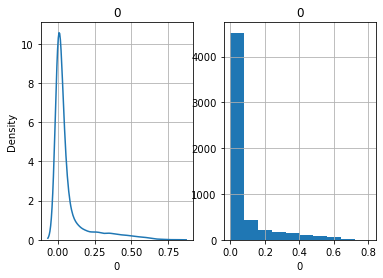

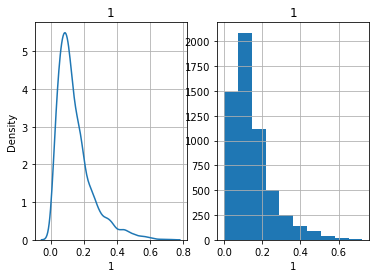

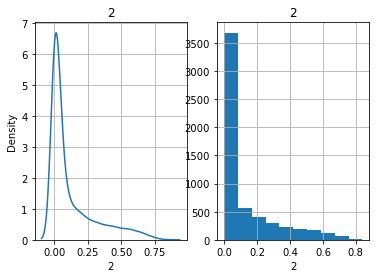

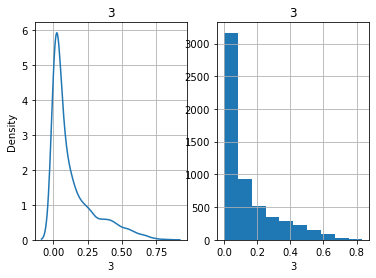

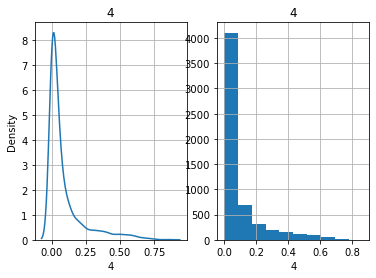

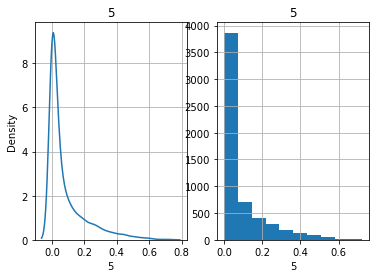

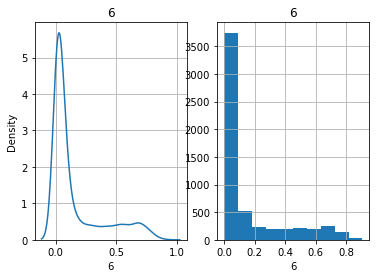

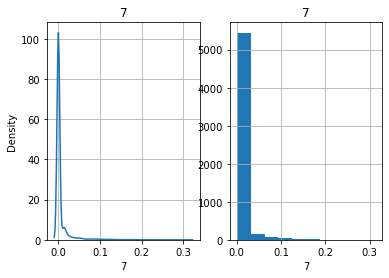

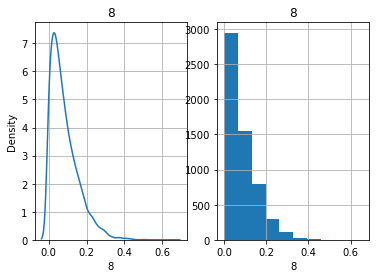

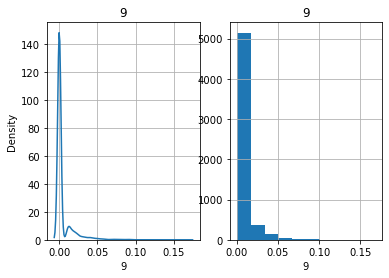

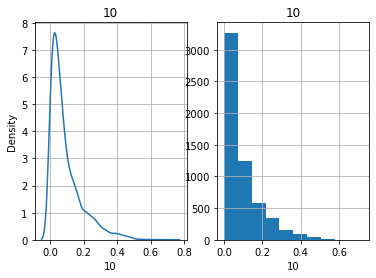

In [231]:
from matplotlib import pyplot as plt
import seaborn as sns

feature_num_f = [(i, feat) for i, feat in lda_model.show_topics(num_words=10, log=False, formatted=True)]

for topic in range(lda_model.num_topics):
    try:
        plt.subplot(1, 2, 1)
        sns.kdeplot(X_pandas[topic])
        plt.grid()
        plt.title(topic)
        plt.xlabel(topic)
        plt.subplot(1, 2, 2)
        plt.hist(X_pandas[topic])
        plt.grid()
        plt.title(topic)
        plt.xlabel(topic)
        plt.show()
    except:
        print('для ', topic, ' ошибка работы')

In [236]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
LM = LogisticRegression()
SV = SVC(gamma='auto', probability=True)
cls_ = ['RF', 'GB', 'KNN', 'LM', 'SV']

list_class = {"cls": [RF, GB, KNN, LM, SV]}

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

limit = 100
start = 2
step = 6


def docs_to_topics_features(ldamodel=lda_model, corpus=corpus):
    feature_topics = list()
    for i, row in enumerate(ldamodel[corpus]):
        i = 0
        doc_topics = []
        for j in range(0, ldamodel.num_topics):
            if i == len(row) or row[i][0] != j:
                doc_topics.append(0.0)
            else:
                doc_topics.append(row[i][1])
                i = i + 1
        feature_topics.append(doc_topics)
    return feature_topics


maxTopic = 0
maxAccur = 0
method = 'RF'

for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=num_topics,
                                            passes=10)
    X_topics = docs_to_topics_features(ldamodel=model, corpus=corpus)
    X_train, X_test, y_train, y_test = train_test_split(X_topics, labels, random_state=0)
    print()
    print("Number of Topics", num_topics)
    for i, model in enumerate(list_class["cls"]):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(cls_[i], accuracy_score(y_test, y_pred))
        if maxAccur < accuracy_score(y_test, y_pred):
            maxTopic = num_topics
            maxAccur = accuracy_score(y_test, y_pred)
            method = cls_[i]


Number of Topics 2
RF 0.19735006973500696
GB 0.24337517433751743
KNN 0.20432357043235705
LM 0.24267782426778242
SV 0.24616457461645747

Number of Topics 8
RF 0.44490934449093444
GB 0.4860529986052999
KNN 0.4616457461645746


/opt/homebrew/Caskroom/miniconda/base/envs/NIRS2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LM 0.4930264993026499
SV 0.47419804741980476

Number of Topics 14
RF 0.5941422594142259
GB 0.5871687587168759
KNN 0.5613668061366807
LM 0.597629009762901
SV 0.5885634588563459

Number of Topics 20
RF 0.5983263598326359
GB 0.5774058577405857
KNN 0.5495118549511855
LM 0.6052998605299861
SV 0.5648535564853556

Number of Topics 26
RF 0.6457461645746164
GB 0.6338912133891214
KNN 0.6094839609483961
LM 0.6338912133891214
SV 0.608786610878661

Number of Topics 32
RF 0.6624825662482566
GB 0.6464435146443515
KNN 0.6157601115760112
LM 0.6624825662482566
SV 0.608786610878661

Number of Topics 38
RF 0.6555090655509066
GB 0.6457461645746164
KNN 0.6108786610878661
LM 0.6324965132496513
SV 0.6059972105997211

Number of Topics 44
RF 0.6694560669456067
GB 0.6471408647140865
KNN 0.6227336122733612
LM 0.6562064156206415
SV 0.5697350069735007

Number of Topics 50
RF 0.6582984658298466
GB 0.6443514644351465
KNN 0.6157601115760112
LM 0.6485355648535565
SV 0.5237099023709902

Number of Topics 56
RF 0.70502092

In [240]:
print(maxTopic, maxAccur, method)

56 0.7050209205020921 RF


In [246]:
max_passes = 0
max_update_every = 0
max_alpha = 'auto'

for passes in [11, 13, 15]:
    for alpha in ['symmetric', 'asymmetric', 'auto']:
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=maxTopic,
                                                passes=passes,
                                                alpha=alpha)
        X_topics = docs_to_topics_features(ldamodel=model, corpus=corpus)
        X_train, X_test, y_train, y_test = train_test_split(X_topics, labels, random_state=0)
        print()
        print(passes, alpha)

        for i, model in enumerate(list_class["cls"]):
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(cls_[i], accuracy_score(y_test, y_pred))
            if maxAccur < accuracy_score(y_test, y_pred):
                max_passes = passes
                max_alpha = alpha


11 symmetric
RF 0.694560669456067
GB 0.6854951185495118
KNN 0.6262203626220363
LM 0.6736401673640168
SV 0.5690376569037657

11 asymmetric
RF 0.694560669456067
GB 0.6778242677824268
KNN 0.6317991631799164
LM 0.6764295676429568
SV 0.5578800557880056

11 auto
RF 0.6882845188284519
GB 0.6792189679218968
KNN 0.6331938633193863
LM 0.6680613668061367
SV 0.5655509065550907

13 symmetric
RF 0.6847977684797768
GB 0.6778242677824268
KNN 0.6387726638772664
LM 0.6847977684797768
SV 0.5327754532775453

13 asymmetric
RF 0.694560669456067
GB 0.6792189679218968
KNN 0.6415620641562064
LM 0.6931659693165969
SV 0.599023709902371

13 auto
RF 0.700836820083682
GB 0.7050209205020921
KNN 0.6527196652719666
LM 0.702231520223152
SV 0.5676429567642957

15 symmetric
RF 0.689679218967922
GB 0.6827057182705718
KNN 0.6387726638772664
LM 0.6666666666666666
SV 0.502092050209205

15 asymmetric
RF 0.699442119944212
GB 0.6861924686192469
KNN 0.6241283124128313
LM 0.6673640167364017
SV 0.5376569037656904

15 auto
RF 0.69

In [262]:
print(max_passes, max_alpha)

15 RF


In [263]:
max_passes = max_passes
max_alpha = max_alpha
max_num_topics = maxTopic

model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                        id2word=dictionary,
                                        distributed=False,
                                        num_topics=max_num_topics,
                                        passes=max_passes,
                                        alpha=max_alpha)
X_topics = docs_to_topics_features(ldamodel=model, corpus=corpus)
X_train, X_test, y_train, y_test = train_test_split(X_topics, labels, random_state=0)
print()
print(passes, alpha)

for i, model in enumerate(list_class["cls"]):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(cls_[i], accuracy_score(y_test, y_pred))


15 auto
RF 0.6645746164574616
GB 0.6582984658298466
KNN 0.6101813110181311
LM 0.6652719665271967
SV 0.5076708507670851


In [264]:
model = RF
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('RF', accuracy_score(y_test, y_pred))


RF 0.6666666666666666


In [266]:
max_acc = 0
best_n_estimators = 0.0
best_max_depth = 0.0

rez = np.zeros((10, 10))

for i, n_tree in enumerate(np.linspace(1, 500, 10)):  # варианты числа деревьев
    for j, deep_tree in enumerate(np.linspace(1, 10, 10)):  # варианты глубины деревьев
        RF = RandomForestClassifier(max_depth=int(deep_tree), n_estimators=int(n_tree))
        y_pred = RF.fit(X_train, y_train).predict(X_test)
        rez[i, j] = accuracy_score(y_test, y_pred)  # сохраняем метрику на отложенной выборке
        if max_acc < rez[i, j]:
            best_n_estimators = n_tree
            best_max_depth = deep_tree
            max_acc = rez[i, j]
        del RF

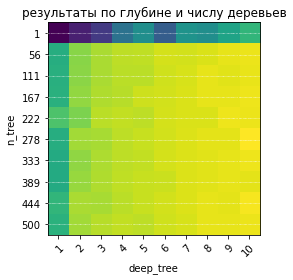

Max_Acc = 0.6582984658298466 N_Tree = 278.22222222222223 Deep_Tree = 10.0


In [267]:
def plot_rez(rez, xlabel, ylabel, title, xyl):
    fig, ax = plt.subplots()

    im = ax.imshow(rez)
    n = rez.shape
    # We want to show all ticks...
    ax.set_xticks(np.arange(n[1]))
    ax.set_yticks(np.arange(n[0]))

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # ... and label them with the respective list entries
    ax.set_yticklabels(np.linspace(xyl[0][0], xyl[0][1], n[0]).astype(int))
    ax.set_xticklabels(np.linspace(xyl[1][0], xyl[1][1], n[1]).astype(int))

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(n[0]):
        for j in range(n[1]):
            text = ax.text(j, i, rez[i, j],
                           ha="center", va="center", color="w", size=2)

    ax.set_title("результаты по глубине и числу деревьев")
    fig.tight_layout()

    plt.show()


plot_rez(rez, 'deep_tree', 'n_tree', 'ACCURACY от числа деревьев и их глубины',
         xyl=[[1, 500], [1, 10]])
print("Max_Acc =", max_acc, "N_Tree =", best_n_estimators, "Deep_Tree =", best_max_depth)

In [ ]:
Выводы:
Задача была классифицировать научные документы по темам.
Была произведена очистка данных, удалены стоп слова, лемматизация слов, построение словаря и копруса слов.
Далее с этими данными была произведена тематическое моделирование, подбор количества классов.
После вектор вероятностей документа по классам был использован в качестве параметров для использования классических методов машинного обучения.
По результатам видно что лучше всех среди всех моделей себя проявил RandomForestClassifier с результатом около Accuracy 0.73 (среди нескольких прогонов).
Время прогона очень долгое, что тоже является недостатком данного способа фича ижиниринга.
Был использован критерий Accuracy так как стоит задача мультиклассовой классификации текстовых документов и для сравнения с предыдущими результатами.